### CAR SALES : LOGISTIC REGRESSION (CLASSIFICATION MODEL)

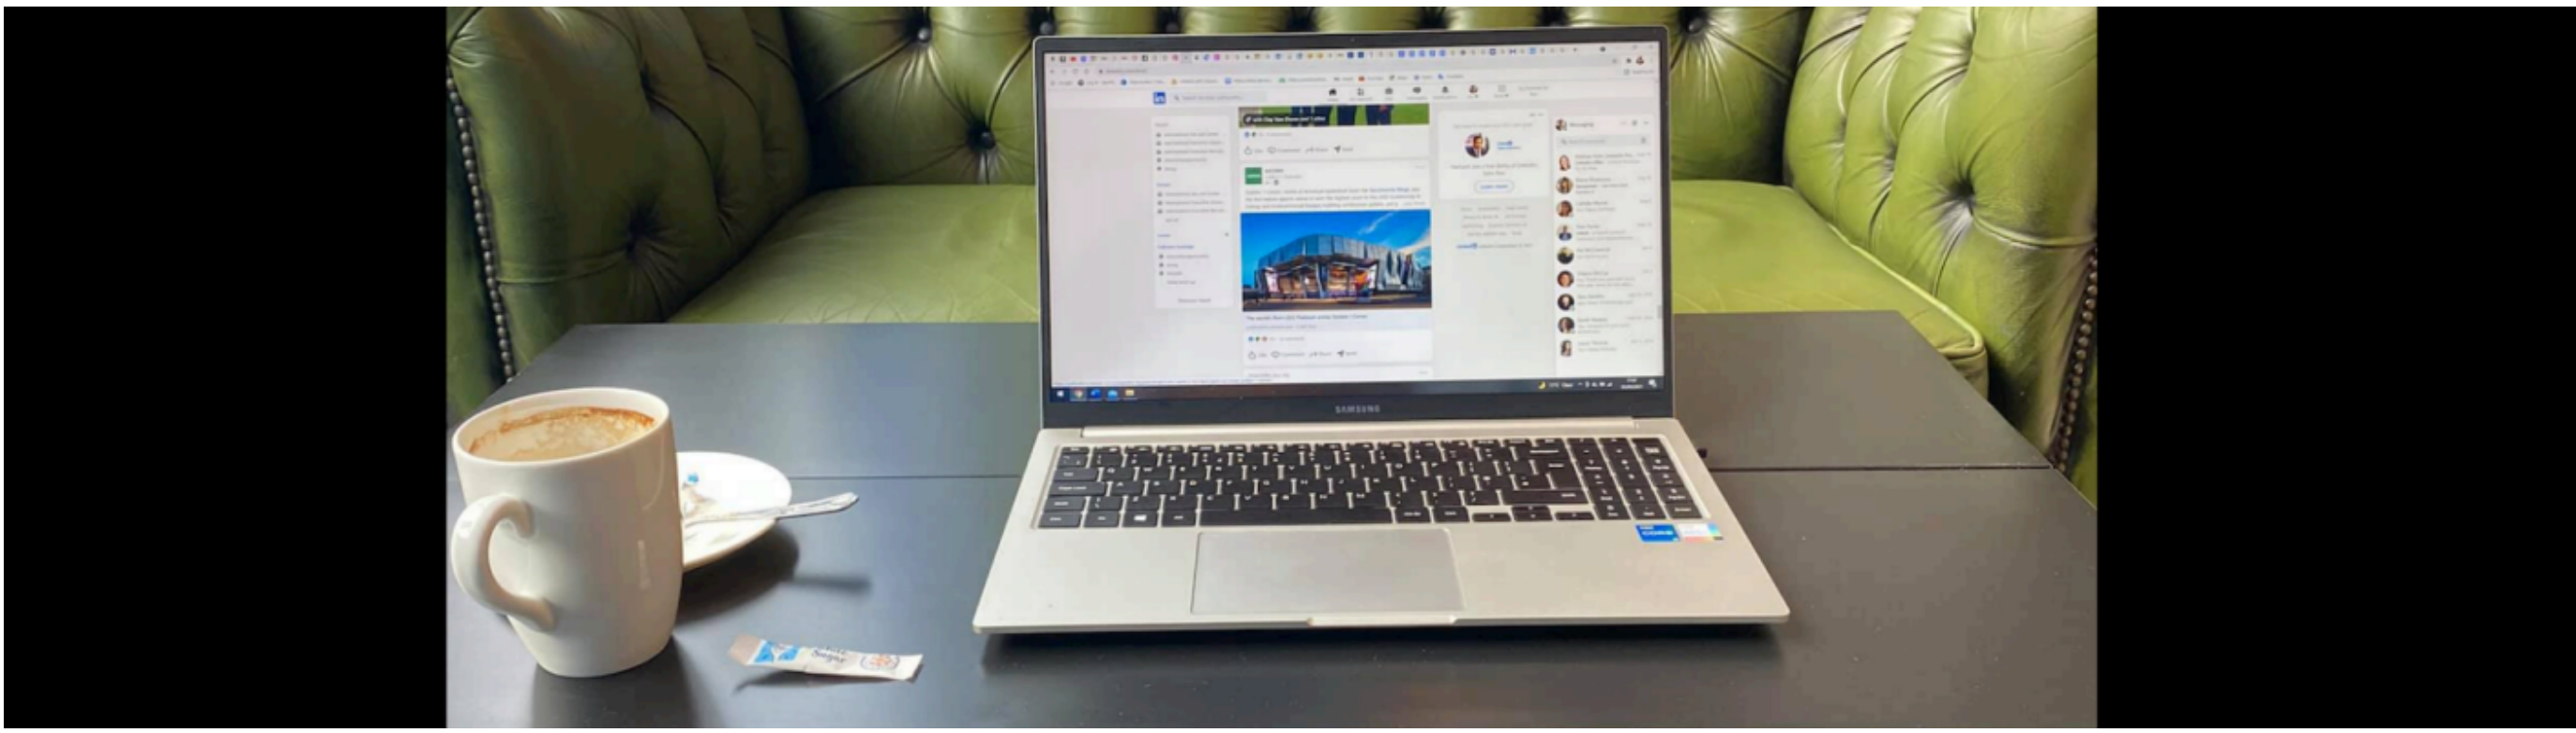

### HEMANT THAPA

### 1. LOADING LIBRARIES 

In [1]:
import math
import time
import statistics as st
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from matplotlib.colors import ListedColormap
from IPython.display import clear_output, display

warnings.filterwarnings("ignore")

### 2. LOADING DATASET

In [2]:
#loading dataset
df = pd.read_csv('car_data.csv')

In [3]:
df[:5]

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


<div style="background-color: silver; padding: 10px;">
    <strong><center>PRE PROCESSING</center></strong>
</div>

In [4]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
#checking shape of dataset, rows x columns
df.shape

(1000, 5)

In [6]:
#checking missing values
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

### 3. FEATURE SELECTION

#### Understanding Features and the Target Variable 

1. **Features (Independent Variables):**
   Features are the essential building blocks of a machine learning model. They are the input variables or attributes that describe the data, providing crucial information to the algorithm. These features represent the characteristics or properties of the data points, which the model uses to make predictions or classifications. For instance, in a housing price prediction model, features could encompass variables like the number of bedrooms, square footage, location, and more.

2. **Target (Dependent Variable):**
   The target variable, also referred to as the dependent variable, is the key component that the machine learning model aims to predict or classify. It serves as the ultimate output that you want to estimate or analyze based on the input features. Using the housing price prediction as an example, the target variable would be the actual sale price of the house. The model learns to make predictions or classifications by recognizing patterns between the input features and the target variable.

In [7]:
#checking index for selecting features
for i,j in enumerate(df.columns):
    print(f'Index {i} : {j}')

Index 0 : User ID
Index 1 : Gender
Index 2 : Age
Index 3 : AnnualSalary
Index 4 : Purchased


In [8]:
#selecting features columns
features_columns = df.columns[2:4]
features_columns

Index(['Age', 'AnnualSalary'], dtype='object')

In [9]:
#selecting features
X = df[features_columns]
X[:5]

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000


In [10]:
#checking shape of feature columns
X.shape

(1000, 2)

In [11]:
df[:5]

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [12]:
#selecting target, purchased columns for classification
y = df['Purchased'].values

In [14]:
#checking dimesion of features and target
print(f'Dimension of Features: {X.ndim}D')
print(f'Dimension of Target: {y.ndim}D')

Dimension of Features: 2D
Dimension of Target: 1D


### 4. SPLITING DATA FOR TRAINING AND TESTING

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#splitting dataset for training and testing
#80 percent training 
#20 percent testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

### 5. FEATURES SCALING 

In [17]:
from sklearn.preprocessing import StandardScaler

#### Understanding Standardization (Z-score Scaling) in Machine Learning

Standardization, also known as Z-score scaling, is a common feature scaling technique used in machine learning. It transforms the values of features to have a mean (average) of 0 and a standard deviation of 1. 

This process helps make features comparable and is particularly useful when dealing with features that are normally distributed or when using machine learning algorithms sensitive to the scale of input features.

The formula for standardization (Z-score scaling) is as follows:
```markdown
X_scaled = (X - X_mean) / X_std


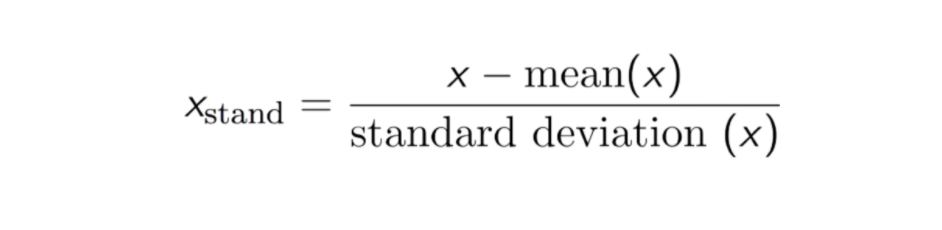

In [18]:
#StandardScaler
scaler = StandardScaler()

In [19]:
#scaling the training data using the fitted scaler and transform the test data using the same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#checking X trained scaled value
X_train_scaled[:5]

array([[-1.33361157,  0.32134116],
       [-0.02339669, -0.45583598],
       [-0.67850413, -1.53524866],
       [-0.77209091, -0.38387513],
       [-0.30415702, -0.55658116]])

In [21]:
#checking X test scaled value
X_test_scaled[:5]

array([[ 1.28681818,  1.83251891],
       [ 0.07019008, -0.15360042],
       [ 0.91247107, -1.24740528],
       [-1.89513223,  0.37890983],
       [-1.24002479, -1.1898366 ]])

In [22]:
#checking shape of train model
print(X_train.shape)
print(y_train.shape)

(800, 2)
(800,)


In [23]:
#checking the shape of test model
print(X_test.shape)
print(y_test.shape)

(200, 2)
(200,)


### 6.TRAINING MODEL

<div style="background-color: silver; padding: 10px;">
    <strong><center>LOGISTIC REGRESSION</center></strong>
</div>

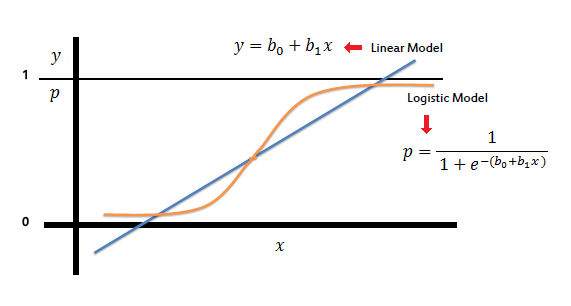

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score

The `LogisticRegression` class in scikit-learn is a versatile implementation of logistic regression for classification tasks. It inherits from several base classes, including `LinearClassifierMixin`, `SparseCoefMixin`, and `BaseEstimator`.

Parameters:
- `penalty` (default: 'l2'): The penalty term to be applied in the logistic regression. It can take values 'l1', 'l2', 'elasticnet', or 'none'.
- `dual` (default: False): Indicates whether to solve the dual optimization problem. It's usually set to False unless the number of samples is smaller than the number of features.
- `tol` (default: 0.0001): Tolerance for stopping criteria.
- `C` (default: 1.0): Inverse of regularization strength; smaller values specify stronger regularization.
- `fit_intercept` (default: True): Specifies whether to fit an intercept term to the model.
- `intercept_scaling` (default: 1): Scales the intercept term.
- `class_weight` (default: None): Weights associated with classes, useful for imbalanced datasets.
- `random_state` (default: None): Seed for the random number generator.
- `solver` (default: 'lbfgs'): Algorithm to use for optimization. Options include 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'.
- `max_iter` (default: 100): Maximum number of iterations to converge.
- `multi_class` (default: 'auto'): Determines the strategy for handling multiple classes. Options include 'ovr' (one-vs-rest) or 'multinomial'.
- `verbose` (default: 0): Controls the verbosity of the solver.
- `warm_start` (default: False): Allows reusing the previous solution to accelerate fitting when set to True.
- `n_jobs` (default: None): Number of CPU cores to use when parallelizing the computation. Useful for large datasets.
- `l1_ratio` (default: None): The mixing parameter for 'elasticnet' penalty. If None, the penalty is l2.


In [25]:
#the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial', 'auto'],
    'fit_intercept': [True],  # Whether to fit an intercept
    'tol': [0.00001, 0.0001, 0.001, 0.01],  # Tolerance for stopping criteria
    'max_iter': [100] #default
                        }

<div style="background-color: silver; padding: 10px;">
    <strong><center>Parameter Grid for Logistic Regression</center></strong>
</div>

#### 1. <span style="color: #000080;">`penalty`</span>:
   - The <span style="color: #000080;">`penalty`</span> parameter controls the type of regularization to apply in logistic regression. It can take one of three values:
     - <span style="color: #008000;">`l1`</span>: L1 regularization encourages sparsity in the model by adding the absolute values of coefficients to the cost function.
     - <span style="color: #008000;">`l2`</span>: L2 regularization discourages large coefficient values by adding the squared values of coefficients to the cost function.
     - <span style="color: #008000;">`elasticnet`</span>: Elastic Net regularization is a combination of L1 and L2 regularization.

#### 2. <span style="color: #000080;">`C`</span>:
   - The <span style="color: #000080;">`C`</span> parameter is the inverse of the regularization strength. Smaller values of <span style="color: #000080;">`C`</span> increase the regularization, making the model more robust to overfitting. Larger values of <span style="color: #000080;">`C`</span> decrease the regularization, allowing the model to fit the data more closely but risking overfitting.

#### 3. <span style="color: #000080;">`solver`</span>:
   - The <span style="color: #000080;">`solver`</span> parameter specifies the optimization algorithm used when training the logistic regression model. The choice of solver depends on the type of regularization you're using. Common solvers include:
     - <span style="color: #008000;">`newton-cg`</span>: Suitable for <span style="color: #008000;">`l2`</span> regularization and multi-class problems.
     - <span style="color: #008000;">`lbfgs`</span>: Also suitable for <span style="color: #008000;">`l2`</span> regularization and multi-class problems.
     - <span style="color: #008000;">`liblinear`</span>: Suitable for <span style="color: #008000;">`l1`</span> or <span style="color: #008000;">`l2`</span> regularization with a dual formulation.
     - <span style="color: #008000;">`sag`</span>: Suitable for <span style="color: #008000;">`l2`</span> regularization and multi-class problems, often faster for large datasets.
     - <span style="color: #008000;">`saga`</span>: An extension of <span style="color: #008000;">`sag`</span> that supports <span style="color: #008000;">`elasticnet`</span> regularization.

#### 4. <span style="color: #000080;">`multi_class`</span>:
   - The <span style="color: #000080;">`multi_class`</span> parameter determines how logistic regression handles multi-class classification problems. It can be set to:
     - <span style="color: #008000;">`ovr`</span> (One-vs-Rest): Treats each class as a binary classification problem.
     - <span style="color: #008000;">`multinomial`</span>: Uses the Softmax function to calculate class probabilities directly.
     - <span style="color: #008000;">`auto`</span>: Automatically selects the most suitable method based on the data and problem type.

When performing hyperparameter tuning with <span style="color: #000080;">`GridSearchCV`</span>, it will explore different combinations of these hyperparameters to find the best configuration for your logistic regression model.

In [26]:
custom_scorer = make_scorer(accuracy_score)

In [27]:
#logistic regression model
model = LogisticRegression()

In [28]:
#grid search cv 
grid_search = GridSearchCV(
    model,             # Model to tune
    param_grid,        # Parameter grid
    cv=5,              # 10-fold cross-validation
    n_jobs=-1,         # Use all available CPU cores for parallel processing
    verbose=1,         # Set verbosity to 2 for detailed output
    refit=True,        # Refit with best hyperparameters
    return_train_score=True,  # Include training scores in results
    scoring='accuracy' #selecting accuracy for scoring
)

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px; text-align: center;">
Key Parameters in GridSearchCV
</div>

<div style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
1. <b>scoring:</b>
</div>
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
 This parameter allows you to specify the scoring metric to evaluate the performance of the model during the grid search.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
 If you don't specify a scoring metric, it defaults to the estimator's default scoring method, which is appropriate for the specific estimator you're using.

<div style="background-color: silver; padding: 10px;">
    <strong><center>Scoring</center></strong>
</div>

#### 1. **Using Accuracy and F1-Score:**
   - In classification tasks, accuracy and F1-score are commonly used scoring metrics to evaluate the performance of classification models.
   - Accuracy measures the overall correctness of predictions, while the F1-score balances precision and recall.

#### 2. **Using Accuracy as a Scoring Metric:**
   - To optimize a classification model using accuracy as the scoring metric, you can define a custom scorer like this:
     ```python
     from sklearn.metrics import make_scorer, accuracy_score
     custom_scorer = make_scorer(accuracy_score)
     grid_search = GridSearchCV(model, param_grid, scoring=custom_scorer, cv=5)
     ```
   - A higher accuracy indicates better model performance.

#### 3. **Using F1-Score as a Scoring Metric:**
   - To optimize a classification model using the F1-score as the scoring metric, define a custom scorer like this:
     ```python
     from sklearn.metrics import make_scorer, f1_score
     custom_scorer = make_scorer(f1_score)
     grid_search = GridSearchCV(model, param_grid, scoring=custom_scorer, cv=5)
     ```
   - A higher F1-score reflects a better balance between precision and recall, which is important for imbalanced datasets.

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">
2. <b>n_jobs:</b>
</div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `n_jobs` parameter determines the number of CPU cores used for parallel processing during the grid search.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">    
    Set it to `-1` to use all available CPU cores for faster execution. This can significantly speed up the grid search process when you have a multi-core CPU.
</p>

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">
3. <b>refit:</b>
</div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    When `refit` is set to `True`, the best estimator with the optimal hyperparameters is refitted with the entire dataset after the grid search is complete.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">    
    This refitting ensures that the final model is trained on all available data, potentially leading to improved model performance.
</p>

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">
4. <b>cv:</b>
</div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `cv` parameter specifies the number of cross-validation folds to use in evaluating each hyperparameter combination.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">    
    Cross-validation is essential for estimating the performance of different hyperparameter settings and helps prevent overfitting.
</p>

<div style="background-color: silver; padding: 10px;">
    <strong><center>Choosing the Number of Cross-Validation Folds in GridSearchCV</center></strong>
</div>

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.1. <b>Default Value:</b>
</p>
By default, `GridSearchCV` uses 5-fold cross-validation if you don't specify the `cv` parameter.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.2. <b>Smaller Datasets:</b>
</p>
For smaller datasets, using a larger number of folds, such as 10-fold or even leave-one-out cross-validation, can be beneficial. It allows you to make efficient use of your limited data and obtain more reliable performance estimates.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.3. <b>Larger Datasets:</b>
</p>
On the other hand, for larger datasets, using fewer folds like 5-fold or 10-fold can be sufficient. This choice reduces computation time while still providing reasonable performance estimates.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.4. <b>Bias-Variance Trade-Off:</b>
</p>
The number of CV folds affects the trade-off between bias and variance in your performance estimates. More folds reduce bias but may increase variance, and vice versa. Choosing the number of folds should balance these factors.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.5. <b>Cross-Validation Variants:</b>
</p>
Consider using variants like stratified k-fold cross-validation or repeated k-fold cross-validation for added robustness in performance estimation.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.6. <b>Computational Resources:</b>
</p>


<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">5. <b>verbose:</b></div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `verbose` parameter controls the verbosity of the output during the grid search.
  <p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">  
    Setting a higher value, such as 1, provides more detailed information about the progress of the search, which can be useful for tracking the optimization process.
</p>

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">6. <b>pre_dispatch:</b></div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `pre_dispatch` parameter determines the number of jobs that are dispatched during parallel execution.
 <p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    By default, it is set to `'2*n_jobs'`, meaning it will consider double the number of available CPU cores. Adjusting this parameter can fine-tune the parallel processing.
</p>

<div style="background-color: silver; padding: 10px;">
    <strong><center>pre_dispatch Parameter</center></strong>
</div>

The `pre_dispatch` parameter in scikit-learn's `GridSearchCV` is used to control the number of jobs that are dispatched during parallel execution when performing a grid search. Here's an explanation of its purpose and how it works:

- **Purpose of `pre_dispatch`:**
  - The main purpose of `pre_dispatch` is to manage how many jobs are dispatched concurrently when conducting a parallel grid search.
  - This parameter is particularly useful when you have a multi-core CPU and you want to take advantage of parallel processing to speed up the grid search.

- **Default Setting:**
  - By default, the `pre_dispatch` parameter is set to `'2*n_jobs'`.
  - `n_jobs` represents the number of CPU cores available for parallel processing.
  - The default setting of `'2*n_jobs'` means that the grid search will consider dispatching jobs for double the number of available CPU cores.
  - This is designed to balance parallel processing efficiency while preventing overloading the CPU with too many jobs at once.

- **Adjusting `pre_dispatch`:**
  - You can adjust the `pre_dispatch` parameter to fine-tune the parallel processing behavior.
  - Increasing the `pre_dispatch` value will allow more jobs to be dispatched concurrently, potentially speeding up the grid search.
  - Decreasing the `pre_dispatch` value will limit the number of concurrently dispatched jobs, which can be helpful if you want to reduce the computational load or if you have limited resources.

- **Choosing `pre_dispatch` Value:**
  - The choice of the `pre_dispatch` value depends on the number of available CPU cores, the complexity of your model, and the available memory.
  - It's a trade-off between taking full advantage of CPU cores and avoiding excessive memory consumption or job scheduling overhead.
  - we can experiment with different values to find the one that optimizes the performance of your grid search while remaining within our hardware's capabilities.




<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">7. <b>error_score:</b></div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `error_score` parameter specifies the value to assign when an error occurs while evaluating a hyperparameter combination.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    This is useful for handling exceptions that might occur during cross-validation.
</p>


<div style="background-color: silver; padding: 10px;">
    <strong><center>Error Score Parameter</center></strong>
</div>

The <strong>error_score</strong> parameter is a configuration option in scikit-learn's <strong>GridSearchCV</strong> that allows you to specify the value to assign when an error occurs while evaluating a hyperparameter combination during cross-validation. This parameter serves a vital role in handling situations where an error might arise during the model's training or evaluation.

Here's a more detailed breakdown of the <strong>error_score</strong> parameter:

- <strong>Purpose of <code>error_score</code>:</strong>
  - The primary purpose of <code>error_score</code> is to provide a strategy for dealing with model training or evaluation errors.
  - In machine learning, not all combinations of hyperparameters may be suitable for a given dataset or model. Some combinations could lead to convergence issues, division by zero errors, or other exceptions.

- <strong>Default Behavior:</strong>
  - By default, if an error occurs during cross-validation when evaluating a hyperparameter combination, <strong>GridSearchCV</strong> will set the <code>error_score</code> to <code>np.nan</code> (NaN), indicating a missing or undefined value.
  - This default behavior helps prevent an erroneous hyperparameter combination from impacting the overall results and allows you to identify problematic configurations.

- <strong>Custom Error Handling:</strong>
  - You can customize the <code>error_score</code> parameter to handle errors according to your specific needs.
  - For example, if you want to assign a specific value (e.g., a large error score) when an error occurs, you can set the <code>error_score</code> to that value. This can be useful when you want to distinguish problematic configurations from valid ones.

- <strong>Decision Strategy:</strong>
  - Deciding how to handle errors using <code>error_score</code> depends on the nature of your problem and the behavior you desire. You can choose to:
    - Ignore the error and continue with the evaluation by setting <code>error_score</code> to a specific value.
    - Set <code>error_score</code> to <code>np.nan</code> to exclude the problematic combination from consideration.
    - Implement custom error handling logic to address specific issues.


<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">8. <b>return_train_score:</b></div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    When set to `True`, the `return_train_score` parameter returns the training scores in addition to the cross-validation scores.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    This can provide insight into how well the model fits the training data for different hyperparameter combinations.
</p>

<div style="background-color: silver; padding: 10px;">
    <strong><center>Return Train Score Parameter</center></strong>
</div>

The **return_train_score** parameter is a configuration option in scikit-learn's **GridSearchCV** that allows you to control whether the training scores are returned in addition to the cross-validation scores during the hyperparameter tuning process. This parameter provides insight into how well the model fits the training data for different hyperparameter combinations.

Here's a more detailed explanation of the **return_train_score** parameter:

- **Purpose of `return_train_score`**:
  - The primary purpose of `return_train_score` is to determine whether or not to include the training scores when obtaining the results of the grid search.
  - Training scores represent the model's performance on the training data, and including them in the results can be valuable for analyzing overfitting and bias-variance trade-offs.

- **Default Setting**:
  - By default, the **GridSearchCV** does not return the training scores. This means that the results obtained from the grid search include only the cross-validation scores.
  - The default behavior is chosen to focus on the generalization performance of the model, as training scores can be overly optimistic and less informative about a model's ability to generalize to unseen data.

- **Customization**:
  - You can customize the behavior by setting the `return_train_score` parameter to `True`.
  - When `return_train_score` is set to `True`, the grid search results will include training scores in addition to cross-validation scores, providing a more comprehensive view of model performance.

- **Interpreting Results**:
  - Having access to training scores can be useful for analyzing how well the model fits the training data. It allows you to assess overfitting, bias, and variance, which can inform decisions about model complexity and hyperparameter choices.

In [29]:
#grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True], 'max_iter': [100],
                         'multi_class': ['ovr', 'multinomial', 'auto'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [30]:
#best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [31]:
#printing best model
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}
Best Estimator: LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', solver='liblinear',
                   tol=1e-05)


### 7. SELECTING BEST MODEL FROM GRID SEARCH 

In [32]:
#best model selection
best_estimator

LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', solver='liblinear',
                   tol=1e-05)

### CROSS VALIDATION 

<div style="background-color: silver; padding: 10px;">
    <strong><center>5-Fold Cross-Validation </center></strong>
</div>

- Start with a dataset containing features and corresponding class labels.

- Divide the dataset into five equally sized, non-overlapping subsets or "folds."

- Perform five iterations, one for each fold.

- In each iteration, one fold serves as the test set, and the remaining four folds combine to form the training set.

- Train the model using the training set and evaluate its performance on the test set.

- Calculate performance metrics (e.g., accuracy, precision, recall) for this iteration.

- After all five iterations, you have five sets of performance metrics, each representing the model's performance on a different test set.

- Calculate statistics, such as the mean and standard deviation, to obtain an overall assessment of the model's performance and its variability across the folds.

**Benefits:**

- Provides a reliable estimate of how well the model generalizes to unseen data.

- Assists in model selection and hyperparameter tuning.

- Helps guard against overfitting by evaluating the model on different subsets of the data.

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
#five fold cross validation
scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='accuracy', verbose=0)

In [35]:
#cross-validation scores
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.80625 0.8375  0.79375 0.83125 0.79375]


In [36]:
#mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

In [37]:
print("Mean Accuracy:", round(mean_score,4))
print("Standard Deviation:", round(std_score,4))

Mean Accuracy: 0.8125
Standard Deviation: 0.0185


### 8. CHECKING OVERFITTING & MODEL EVALUATION

<div style="background-color: silver; padding: 10px;">
    <strong><center>The Importance of Comparing Metrics for Overfitting Detection</center></strong>
</div>

- **False Accuracy**:
  
  Relying solely on accuracy can be misleading. A model with high training accuracy may still suffer from overfitting, meaning it doesn't generalize well to unseen data.
 
- **Overfitting vs. Generalization**:
  
  To distinguish between overfitting and good generalization, you need to assess the model's performance on unseen data. Metrics help identify this crucial distinction.

- **Metrics Reveal Different Aspects**:
  
  Different evaluation metrics (e.g., precision, recall, F1-score) focus on different aspects of model performance. They offer insights into how well the model performs on specific tasks or classes, helping to detect overfitting more effectively.

- **Bias-Variance Trade-off**:
  
  The choice of evaluation metrics helps you strike a balance between bias and variance. Metrics can guide you in fine-tuning this trade-off and avoiding overfitting.

- **Cross-Validation for Robust Evaluation**:
  
  Cross-validation techniques, such as k-fold cross-validation, systematically assess a model's performance on multiple data subsets. This approach aids in detecting and mitigating overfitting and provides a more reliable estimate of model performance.

- **Visualizing Model Performance**:
  
  Visualizing metrics through tools like learning curves and confusion matrices can provide a deeper understanding of a model's behavior. Overfitting often becomes evident when there's a significant gap between training and testing performance.

- **Comparing Models and Variants**:
  
  To select the best model or hyperparameters, you need to compare different configurations. Metrics allow for an objective evaluation, helping you choose the model with the right balance of accuracy, precision, recall, and other factors.

- **Early Stopping**:
  
  Metrics can be used in early stopping techniques to prevent overfitting during training. Training is halted when the model's performance on validation data starts to degrade, preventing it from learning noise.

- **Generalization to Real-World Scenarios**:
  
  The ultimate goal is to build models that perform well in real-world applications, where the data will vary. Comprehensive metrics analysis ensures the model's readiness for these varied scenarios.

- **Risk Mitigation**:
  
  Overfit models are prone to making costly errors when applied to new data. Careful metric evaluation helps mitigate the risks associated with overfitting, particularly in critical applications.

In [38]:
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             classification_report, 
                             precision_score, 
                             recall_score, f1_score)

In [39]:
#Prediction of train and test set
y_train_pred = best_estimator.predict(X_train_scaled)
y_test_pred = best_estimator.predict(X_test_scaled)

#### 9. COMPARING CONFUSION MATRIX BETWEEN TRAINING & TEST DATASET

In [40]:
#confusion matrices to analyse overfitting
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

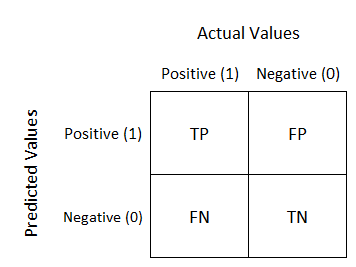

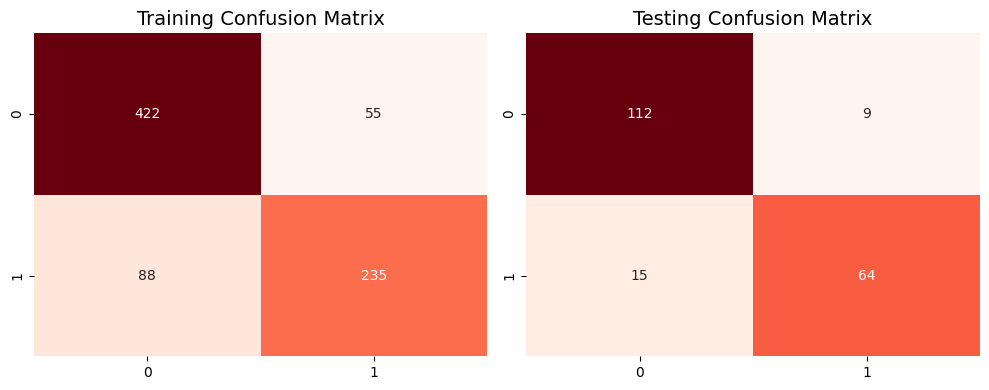

In [41]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Training Confusion Matrix", fontsize=14)
plt.subplot(1, 2, 2)
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Testing Confusion Matrix", fontsize=14)
plt.tight_layout()
plt.show()

In [42]:
#indexing each value for train and test set
TP_train = train_confusion_matrix[0, 0]  #true positives in training set
TN_train = train_confusion_matrix[1, 1]  #true  ngatives in training set
FP_train = train_confusion_matrix[0, 1]  #false positives in training set
FN_train = train_confusion_matrix[1, 0]  #false negatives in training set

TP_test = test_confusion_matrix[0, 0]  #true positives in testing set
TN_test = test_confusion_matrix[1, 1]  #true negatives in testing set
FP_test = test_confusion_matrix[0, 1]  #false positives in testing set
FN_test = test_confusion_matrix[1, 0]  #false negatives in testing set

In [43]:
print("Training Set:")
print()
print(f'True Positives: {TP_train}')
print(f'True Negatives: {TN_train}')
print(f'False Positives: {FP_train}')
print(f'False Negatives: {FN_train}')

Training Set:

True Positives: 422
True Negatives: 235
False Positives: 55
False Negatives: 88


In [44]:
#correctly and falsely predicted values in the training set
correctly_predicted_train = TP_train + TN_train
falsely_predicted_train = FP_train + FN_train
print(f'Total Correctly Predicted: {correctly_predicted_train}')
print(f'Total Falsely Predicted: {falsely_predicted_train}')

Total Correctly Predicted: 657
Total Falsely Predicted: 143


In [45]:
print("\nTesting Set:")
print()
print(f'True Positives: {TP_test}')
print(f'True Negatives: {TN_test}')
print(f'False Positives: {FP_test}')
print(f'False Negatives: {FN_test}')


Testing Set:

True Positives: 112
True Negatives: 64
False Positives: 9
False Negatives: 15


In [46]:
#correctly and falsely predicted values in the testing set
correctly_predicted_test = TP_test + TN_test
falsely_predicted_test = FP_test + FN_test
print(f'Total Correctly Predicted: {correctly_predicted_test}')
print(f'Total Falsely Predicted: {falsely_predicted_test}')

Total Correctly Predicted: 176
Total Falsely Predicted: 24


#### 9.1 RESULT & CONCLUSION

<div style="background-color: silver; padding: 10px;">
    <strong><center>Model Performance Result</center></strong>
</div>

In the evaluation of the machine learning model, we have collected data on its performance for both the training and testing sets. Here are the key results:

**Training Set:**

- True Positives: 422
- True Negatives: 235
- False Positives: 55
- False Negatives: 88

In the training set, the model correctly predicted 422 cases and made 143 incorrect predictions, with 657 total predictions.

**Testing Set:**

- True Positives: 112
- True Negatives: 64
- False Positives: 9
- False Negatives: 15

In the testing set, the model correctly predicted 176 cases and made 24 incorrect predictions, with 200 total predictions.

<div style="background-color: silver; padding: 10px;">
    <strong><center>Conclusion</center></strong>
</div>

- The model demonstrated a high degree of accuracy in the training set, with a high number of true positives and true negatives.

- In the testing set, the model maintained its performance with a significant number of correct predictions, indicating its generalization ability.

- The total correctly predicted values in both sets reflect the model's capacity to make accurate predictions in a real-world scenario.

- The total falsely predicted values, while present, are relatively low, suggesting a reasonably reliable model.


#### 9.2 ACCURACY & ERROR EVALUATION

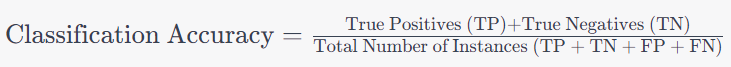

In [47]:
# calculate classification accuracy for training and test set
classification_accuracy_train = (TP_train + TN_train) / float(TP_train + TN_train + FP_train + FN_train)
classification_accuracy_test = (TP_test + TN_test) / float(TP_test + TN_test + FP_test + FN_test)

In [48]:
print(f'Classification Train Accuracy: {round(classification_accuracy_train, 5)}')

Classification Train Accuracy: 0.82125


In [49]:
print(f'Classification Test Accuracy: {round(classification_accuracy_test, 5)}')

Classification Test Accuracy: 0.88


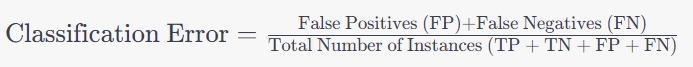

In [50]:
#calculate classification error for training and test set
classification_error_train = (FP_train + FN_train) / float(TP_train + TN_train + FP_train + FN_train)
classification_error_test = (FP_test + FN_test) / float(TP_test + TN_test + FP_test + FN_test)

In [51]:
print(f'Classification Train Error: {round(classification_error_train, 5)}')
print(f'Classification Test Error: {round(classification_error_test, 5)}')

Classification Train Error: 0.17875
Classification Test Error: 0.12


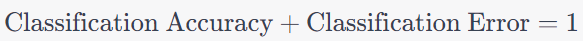

In [52]:
classification_error_test + classification_accuracy_test

1.0

In [53]:
classification_error_train + classification_accuracy_train

1.0

#### ACCURACY & ERROR VERIFICATION

In [54]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [55]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.82125
Testing Accuracy: 0.88


In [56]:
error_test = 1 - test_accuracy
print(f'Classification error test: {error_test}')

Classification error test: 0.12


In [57]:
error_train = 1 - train_accuracy
print(f'Classification error train: {round(error_train,5)}')

Classification error train: 0.17875


#### RESULT & CONCLUSION

In the assessment of the machine learning model, the following results have been obtained for both the training and testing sets:

<div style="background-color: silver; padding: 10px;">
    <strong><center>Accuracy and Error Evaluation</center></strong>
</div>

- **Training Classification Accuracy:** 0.82125
- **Testing Classification Accuracy:** 0.88

Classification accuracy measures the proportion of correctly predicted instances in each dataset.

- **Training Classification Error:** 0.17875
- **Testing Classification Error:** 0.12

Classification error represents the proportion of misclassified instances in each dataset.

#### Verification with Scikit-Learn

To verify these results, Scikit-Learn's `accuracy_score` function was employed, yielding the following:

- **Training Accuracy (Scikit-Learn):** 0.82125
- **Testing Accuracy (Scikit-Learn):** 0.88

The results from Scikit-Learn align with the accuracy values calculated manually.

- **Testing Classification Error (Calculated):** 0.12
- **Training Classification Error (Calculated):** 0.17875

The calculated classification error on the testing set matches the value obtained using Scikit-Learn's `accuracy_score`.

<div style="background-color: silver; padding: 10px;">
    <strong><center>Conclusion</center></strong>
</div>

The evaluation of the model's performance is summarized as follows:

- On the testing data, the model achieves a classification accuracy of approximately 88%, with a corresponding classification error of 12%. This performance suggests that the model performs well in classifying instances it hasn't seen during training.

These metrics provide valuable insights into the model's performance and its ability to generalize to new data, which is essential for its practical application.

#### 9.3 CLASSIFICATION REPORT 

In [58]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       477
           1       0.81      0.73      0.77       323

    accuracy                           0.82       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.82      0.82      0.82       800



In [59]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       121
           1       0.88      0.81      0.84        79

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



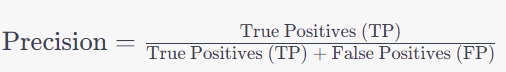

In [60]:
#precision train
precision_train = TP_train / float(TP_train + FP_train)
print(f'Precision (Training): {round(precision_train, 4)}')

Precision (Training): 0.8847


In [61]:
#precision test
precision_test = TP_test / float(TP_test + FP_test)
print(f'Precision (Testing): {round(precision_test, 4)}')

Precision (Testing): 0.9256


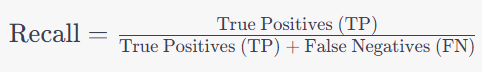

In [62]:
#recall train
recall_train = TP_train / float(TP_train + FN_train)
print(f'Recall (Training): {round(recall_train, 4)}')

Recall (Training): 0.8275


In [63]:
#recall test
recall_test = TP_test / float(TP_test + FN_test)
print(f'Recall (Testing): {round(recall_test, 4)}')

Recall (Testing): 0.8819


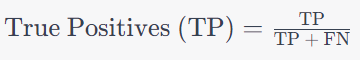

In [64]:
#true positive rate train
true_positive_rate_train = TP_train / float(TP_train + FN_train)
print(f'True Positive Rate (Training): {round(true_positive_rate_train, 4)}')

True Positive Rate (Training): 0.8275


In [65]:
#true positive rate test
true_positive_rate_test = TP_test / float(TP_test + FN_test)
print(f'True Positive Rate (Testing): {round(true_positive_rate_test, 4)}')

True Positive Rate (Testing): 0.8819


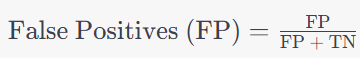

In [66]:
#false positive rate train
false_positive_rate_train = FP_train / float(FP_train + TN_train)
print(f'False Positive Rate (Training): {round(false_positive_rate_train, 4)}')

False Positive Rate (Training): 0.1897


In [67]:
#false positive rate test
false_positive_rate_test = FP_test / float(FP_test + TN_test)
print(f'False Positive Rate (Testing): {round(false_positive_rate_test, 4)}')


False Positive Rate (Testing): 0.1233


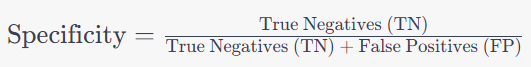

In [68]:
#specificity Train
specificity_train = TN_train / float(TN_train + FP_train)
print(f'Specificity (Training): {round(specificity_train, 4)}')

Specificity (Training): 0.8103


In [69]:
#specificity Test
specificity_test = TN_test / float(TN_test + FP_test)
print(f'Specificity (Testing): {round(specificity_test, 4)}')

Specificity (Testing): 0.8767



<div style="background-color: silver; padding: 10px;">
    <strong><center>Classification Report</center></strong>
</div>

### Training Data:
The classification report for the training data provides insights into the model's performance on the training set. It includes key metrics such as precision, recall, F1-score, and support.

- **Precision (Training):** The precision for class 1 is 0.8847, indicating that when the model predicts a positive class, it is correct approximately 88.47% of the time.
- **Recall (Training):** The recall for class 1 is 0.8275, meaning that the model correctly identifies approximately 82.75% of the actual positive instances.
- **F1-Score (Training):** The F1-score for class 1 is 0.8548, which is a harmonic mean of precision and recall.
- **Accuracy (Training):** The overall accuracy on the training data is 82%, suggesting that the model correctly classifies 82% of the instances.

### Testing Data:
The classification report for the testing data provides a similar analysis to evaluate how well the model generalizes to unseen data.

- **Precision (Testing):** The precision for class 1 is 0.9256, indicating a high level of correctness in positive class predictions.
- **Recall (Testing):** The recall for class 1 is 0.8819, suggesting that the model correctly identifies a significant portion of the positive instances in the testing data.
- **F1-Score (Testing):** The F1-score for class 1 is 0.9032, indicating a balance between precision and recall.
- **Accuracy (Testing):** The overall accuracy on the testing data is 88%, indicating that the model performs well on unseen data.

### Specificity

### Training Data:

- **Specificity (Training):** The specificity for the training data is 0.8103, suggesting that the model correctly identifies approximately 81.03% of the actual negative instances.

### Testing Data:

- **Specificity (Testing):** The specificity for the testing data is 0.8767, suggesting that the model correctly identifies approximately 87.67% of the actual negative instances in the testing data.



#### 9.4 ROC CURVE AND AUC

In [70]:
from sklearn.metrics import roc_curve, auc

In [71]:
#use the best estimator to make predictions on the test data
y_pred_proba = best_estimator.predict_proba(X_test_scaled)[:, 1]

#use the best estimator to make predictions on the train data
y_pred_proba_train = best_estimator.predict_proba(X_train_scaled)[:, 1]

In [72]:
#ROC curve train and test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)

In [73]:
#AUC (Area Under the Curve)
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)

In [74]:
print(f'Roc AUC Test: {roc_auc_test:.4f}')
print(f'Roc AUC Train: {roc_auc_train:.4f}')

Roc AUC Test: 0.9448
Roc AUC Train: 0.9073


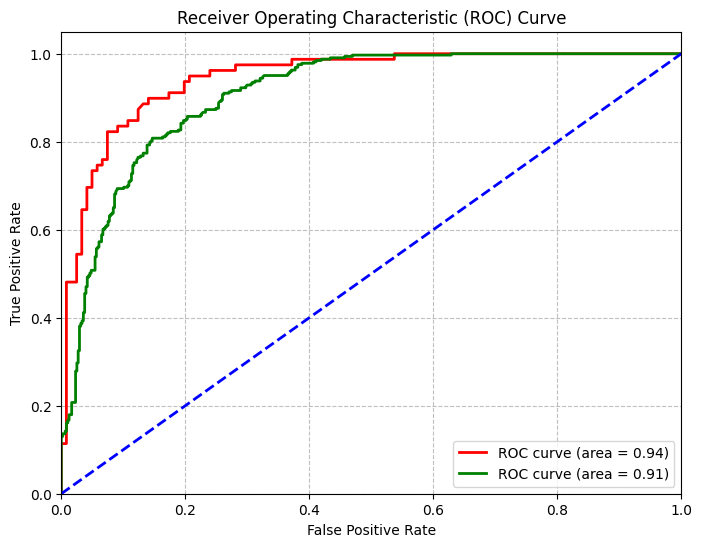

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()


<div style="background-color: silver; padding: 10px;">
    <strong><center>Area Under the ROC Curve (ROC AUC) Analysis
</center></strong>
</div>

### Test Data Analysis:

- **ROC AUC Test:** The ROC AUC for the test data is 0.9448. This value indicates that the model performs exceptionally well in distinguishing between positive and negative instances in the test dataset. A higher ROC AUC suggests a superior level of discrimination.

### Training Data Analysis:

- **ROC AUC Train:** The ROC AUC for the training data is 0.9073. This value signifies strong performance on the training data, although it is slightly lower than the ROC AUC for the test data.

## Interpretation and Implications

The ROC AUC analysis provides valuable insights into the model's performance:

- The high ROC AUC value for the test data (0.9448) demonstrates the model's effectiveness in distinguishing between positive and negative instances. This is a crucial characteristic for practical applications where accurate classification is vital.

- The ROC AUC value for the training data (0.9073) suggests that the model has learned well from the training data. However, the slight difference between the training and test data ROC AUC values may indicate a minor degree of overfitting.



<div style="background-color: silver; padding: 10px;">
    <strong><center>DECISION BOUNDARY</center></strong>
</div>

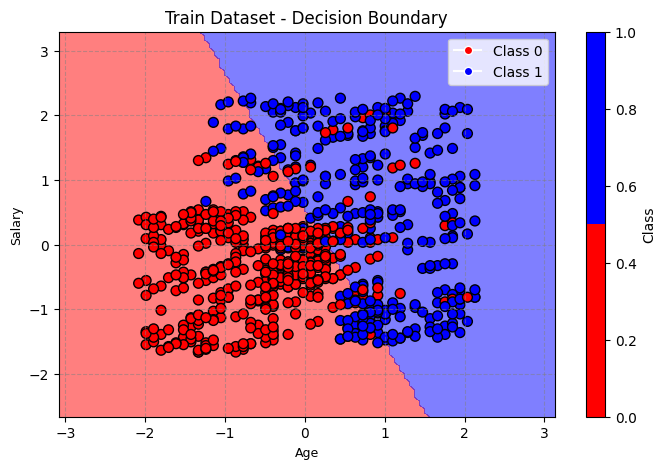

In [77]:
#mesh grid for the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

#predict the class for each point in the mesh grid using the best estimator
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#custom color map for decision boundaries
cmap_custom = ListedColormap([ 'red','blue'])
#decision boundary and training data
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=cmap_custom, alpha=0.5)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_custom, marker='o', edgecolors='k', s=50)
plt.ylabel("Salary", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.title("Train Dataset - Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.colorbar(label='Class')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=6, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=6, label='Class 1')])
plt.show()

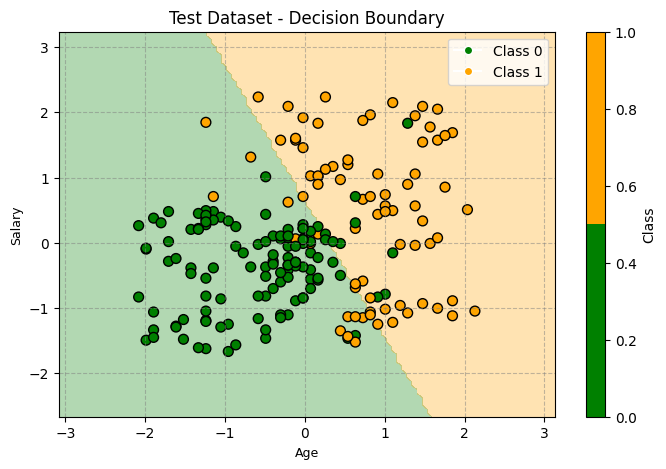

In [78]:
#mesh grid for the decision boundary
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

#predict the class for each point in the mesh grid using the best estimator
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#custom color map for decision boundaries
cmap_custom = ListedColormap([ 'green','orange'])
#plot the decision boundary and test data
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, levels=1, cmap=cmap_custom, alpha=0.3)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=cmap_custom, edgecolors='k', s=50)
plt.ylabel("Salary", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.title("Test Dataset - Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.colorbar(label='Class')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=6, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=6, label='Class 1')])
plt.show()

## REFERENCES

1. **Logistic Regression Example using scikit-learn**
   - [Logistic Regression 3-class Classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)


2. **Logistic Regression Overview**
   - [An Overview of Logistic Regression in Machine Learning](https://www.saedsayad.com/logistic_regression.htm)


Github: https://github.com/AnalyticalHarry

YouTube: https://www.youtube.com/@AnalyticalHarry4